## Import Modules

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np 
from gensim import models
from weat_wefat.src.lib import weat
from weat_wefat.src.lib import weat_tables
import os
import scipy
import matplotlib.pyplot as plt
import importlib
from scipy import stats
import seaborn as sns
import fasttext
import fasttext.util
import glob
importlib.reload(weat_tables)

<module 'weat_wefat.src.lib.weat_tables' from '/Users/adimaini/Documents/GW/Research/CODE.nosync/weat_wefat/src/lib/weat_tables.py'>

## Load Glove Model

In [17]:
# import and load glove model
def loadGloveModel(file):
    print("Loading glove model...")
    f = open(file,'r', encoding='utf-8')
    gloveModel = {}
    for line in f:
        splitLines = line.split(' ')
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

In [18]:
# load Glove model
glove = loadGloveModel('data/glove.840B.300d.txt')

Loading glove model...
2196017  words loaded!


## Load fastText model

In [7]:
def load_fasttext(model): 
    
    model_path = 'data/' + model
    ft = fasttext.load_model(model_path)
    return ft

In [8]:
ft = load_fasttext('cc.ht.300.bin')

### Evaluate corpus bins for their sizes 

In [98]:
def corpus_bins(): 
    '''Runs the OpenSubtitle 2018 corpus bins for the gender weat tests'''
    
    bins = [f for f in os.listdir('data/OpenTitle') if f.endswith('.bin')]

    df = pd.DataFrame()
    for corpus in bins: 
        test_df = output_table(model = load_fasttext('/OpenTitle/' + corpus), 
                       algorithm = 'weat', 
                       directory = 'targets_attributes_data/gender weat/')
        test_df['corpus'] = corpus
        df = pd.concat([df, test_df], axis=0)
    
    df.corpus = df.corpus.replace('001pct_embeddings-003.bin', 0.001)
    df.corpus = df.corpus.replace('01pct_embeddings-006.bin', 0.01)
    df.corpus = df.corpus.replace('1pct_embeddings-002.bin', 1)
    df.corpus = df.corpus.replace('10pct_embeddings-005.bin', 10)
    df.corpus = df.corpus.replace('50pct_embeddings-004.bin', 50)
    
    return df

In [71]:
df = corpus_bins()

Reading files...

targets_attributes_data/gender weat/male vs female names.csv
targets_attributes_data/gender weat/science vs arts.csv
targets_attributes_data/gender weat/math vs arts.csv
Finished.
Reading files...

targets_attributes_data/gender weat/male vs female names.csv
targets_attributes_data/gender weat/science vs arts.csv
targets_attributes_data/gender weat/math vs arts.csv
Finished.
Reading files...

targets_attributes_data/gender weat/male vs female names.csv
targets_attributes_data/gender weat/science vs arts.csv
targets_attributes_data/gender weat/math vs arts.csv
Finished.
Reading files...

targets_attributes_data/gender weat/male vs female names.csv
targets_attributes_data/gender weat/science vs arts.csv
targets_attributes_data/gender weat/math vs arts.csv
Finished.
Reading files...

targets_attributes_data/gender weat/male vs female names.csv
targets_attributes_data/gender weat/science vs arts.csv
targets_attributes_data/gender weat/math vs arts.csv
Finished.


In [92]:
# reading in the .csv that was exported in the above cells with the 'corpus_bins'
df = pd.read_csv('data/OpenSubtitles_gender_tests.csv', index_col=False)

In [96]:
df.sort_values(by=['Targets', 'corpus'])

,Targets,Attributes,Effect Size,P-Value,corpus
9,"['Male names', 'Female names']","['Career', 'Family']",-0.115712,0.588382,0.001
12,"['Male names', 'Female names']","['Career', 'Family']",0.582209,0.126697,0.010
3,"['Male names', 'Female names']","['Career', 'Family']",1.521258,0.001008,1.000
0,"['Male names', 'Female names']","['Career', 'Family']",1.358275,0.003356,10.000
6,"['Male names', 'Female names']","['Career', 'Family']",1.540280,0.000930,50.000
11,"['Math', 'Arts']","['Male terms', 'Female terms']",-0.560788,0.870804,0.001
14,"['Math', 'Arts']","['Male terms', 'Female terms']",-0.440599,0.811011,0.010
5,"['Math', 'Arts']","['Male terms', 'Female terms']",-0.125233,0.599607,1.000
2,"['Math', 'Arts']","['Male terms', 'Female terms']",1.109598,0.013622,10.000
8,"['Math', 'Arts']","['Male terms', 'Female terms']",1.214212,0.008197,50.000


### Gender weats on word embeddings

In [73]:
def gender_hat(): 
    '''Runs the gender weat tests using fasttext haitian creole word embeddings'''
    GENDER_DIR = 'targets_attributes_data/haitian-creole/gender weat/'
    df = output_table(model = load_fasttext('cc.ht.300.bin'),
                      algorithm = 'weat', 
                      directory = GENDER_DIR)
    return df

In [97]:
df = gender_hat()

Reading files...

targets_attributes_data/haitian-creole/gender weat/science vs arts.csv
targets_attributes_data/haitian-creole/gender weat/math vs arts.csv
Finished.


### run the good/bad words testing for what is considered good and bad with pre-trained word embeddings

In [9]:
df_good_bad = weat_tables.output_table(model=ft,
                                filepath = '/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/targets_attributes_data/haitian-creole/wefat sanitation disease etc.csv',
                                algorithm = 'wefat')

Reading files...

Finished.


In [27]:
df_good_bad_cp = df_good_bad.copy()

In [30]:
english_words = ['sanitation', 'clean',  'toilet', 'hands', 'water', 'hygiene', 'covid', 'vaccine',  
                 'water', 'cholera', 'diarrhea', 'fever', 'typhoid', 'garbage', 'osmosis', 'filter', 
                 'bottled', 'wells', 'fresh', 'pump', 'springs', 'latrine', 'DINEPA', 'CAEPA', 'maintenance', 
                 'treatment', 'fecal', 'sludge', 'dirty', 'malaria', 'feces']
df_good_bad_cp['English Words'] = english_words
df_good_bad_cp.rename(columns={'Target': 'Haitian Word'}, inplace=True)
new_order = ['English Words', 'Haitian Word', 'Effect Size', 'P-Value']
df_good_bad_cp[new_order].to_csv('data/good_bad_weat.csv')

In [6]:
# haitian-creole weat test - flowers vs insects
df_haitian = output_table(model=ft, directory='targets_attributes_data/haitian-creole/', algorithm='weat')

NameError: name 'ft' is not defined

In [145]:
df_haitian_wefat = output_table(model=ft,
                                filepath = '/Users/adimaini/Documents/GW/Research/CODE/WEAT-WEFAT/targets_attributes_data/haitian-creole/sanitation disease wefat.csv',
                                algorithm = 'wefat')

Reading files...

Finished.


In [146]:
df_haitian_wefat

,Target,Effect Size,P-Value
0,sanitasyon,0.08,0.395601
1,ijyèn,-0.04,0.557786
2,flòch,0.35,0.110377
3,pwòp,0.27,0.171211
4,filtre,-0.23,0.788114
5,savon,-0.04,0.559481
6,lave,0.00,0.495642
7,maladi,-0.19,0.747552
8,dyare,-0.35,0.889312
9,kolera,-0.18,0.737959


## ANEW Dataset import

In [105]:
BELLEZZA_LEXICON_PATH = '/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/data/Bellezza_Lexicon.csv'
PLE_UNP_PATH = '/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/targets_attributes_data/haitian-creole/pleasant vs unpleasant.csv'
BELLEZZA_WEAT_OUTPUT = '/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/data/bellezza_valnorm_output.csv'
BELLEZZA_WEAT = '/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/targets_attributes_data/haitian-creole/bellezza_weat.csv'


In [44]:
anew = pd.read_csv(BELLEZZA_LEXICON_PATH,
                   usecols=['word', 'Haitian Creole word', 'combined_pleasantness'])

In [45]:
anew[anew.duplicated(subset='Haitian Creole word', keep='first')].count()

word                     19
Haitian Creole word      19
combined_pleasantness    19
dtype: int64

In [46]:
# group the alike words together and average their 'combined_pleasantness' scores
anew_g = anew.groupby(by='Haitian Creole word', axis=0).mean().reset_index()

In [47]:
anew_g.sort_values(by='Haitian Creole word')['Haitian Creole word']

0      Anbisyon
1      Apetisan
2         Bunny
3      Komisyon
4           Liv
         ...   
375         zam
376       zanmi
377       zwazo
378       zòrye
379        òkès
Name: Haitian Creole word, Length: 380, dtype: object

There are 19 duplicated words in haitian creole translations of bellezza lexicon words

In [48]:
[word for word in anew_g['Haitian Creole word'] if word[0].isupper()]

['Anbisyon',
 'Apetisan',
 'Bunny',
 'Komisyon',
 'Liv',
 'Mizik',
 'Nectar',
 'Pak',
 'Stink']

In [49]:
# read the pleasant and unpleasant associations
plun = pd.read_csv(PLE_UNP_PATH, header=None, index_col=0)

In [88]:
# output the new .csv file that can be processed
df = pd.concat([anew['Haitian Creole word'].to_frame().T.reset_index(), plun.reset_index().set_index(0)])
# df.to_csv(BELLEZZA_WEAT)

In [ ]:
# running the WEFAT test with the Bellezza word association test
bellezza_test = weat_tables.output_table(model=ft,
                            filepath = BELLEZZA_WEAT, 
                            algorithm = 'wefat')

Reading files...



In [ ]:
testing = weat_tables.output_table(ft, 'wefat', filepath='/Users/adimaini/Documents/GW/Research/CODE.nosync/WEAT-WEFAT/targets_attributes_data/tests/teseting_dir.csv')
testing

In [ ]:
bellezza_test[bellezza_test.Target.duplicated(keep=False)].sort_values(by='Target', ascending=True)

In [118]:
bellezza_test_merge = bellezza_test.merge(right=anew_g, left_on='Target', right_on='Haitian Creole word')

In [120]:
anew_g

,Haitian Creole word,combined_pleasantness
0,Anbisyon,4.28
1,Apetisan,4.23
2,Bunny,4.33
3,Komisyon,3.12
4,Liv,3.69
...,...,...
375,zam,2.08
376,zanmi,4.53
377,zwazo,4.03
378,zòrye,4.15


In [119]:
bellezza_test_merge

,Target,Effect Size,P-Value,Haitian Creole word,combined_pleasantness
0,abi,-0.29,0.847159,abi,1.530
1,aksidan,0.34,0.120330,aksidan,1.535
2,aksidan,0.02,0.466821,aksidan,1.535
3,akonplisman,0.12,0.348215,akonplisman,4.570
4,adorabl,0.35,0.110102,adorabl,4.400
...,...,...,...,...,...
394,fenèt,0.40,0.081400,fenèt,3.570
395,diven,0.10,0.374362,diven,3.880
396,saj,0.12,0.345884,saj,4.360
397,fanm,0.24,0.201777,fanm,4.240


In [114]:
bellezza_test_merge['Haitian Creole word'].drop_duplicates()

0              abi
1          aksidan
5      akonplisman
6          adorabl
7            tandr
          ...     
436          fenèt
437          diven
438            saj
439           fanm
440       mond lan
Name: Haitian Creole word, Length: 380, dtype: object

In [106]:
bellezza_test_merge.to_csv(BELLEZZA_WEAT_OUTPUT)

In [243]:
# calculate the pearson correlation between 'combined_pleasantess' from Bellezza lexicon and 
# the fastText word embedding based valence scores.
stats.pearsonr(bellezza_test_merge['Effect Size'], bellezza_test_merge['combined_pleasantness'])

(0.2930203491124346, 5.833247860131412e-09)

In [247]:
bellezza_test_merge

,Target,Effect Size,P-Value,Haitian Creole word,combined_pleasantness
0,Anbisyon,0.34,0.114411,Anbisyon,4.28
1,Apetisan,0.32,0.128328,Apetisan,4.23
2,Bunny,0.34,0.120233,Bunny,4.33
3,Komisyon,0.41,0.076256,Komisyon,3.12
4,Liv,0.68,0.008253,Liv,3.69
...,...,...,...,...,...
375,zam,-0.03,0.534607,zam,2.08
376,zanmi,0.55,0.025990,zanmi,4.53
377,zwazo,0.23,0.205758,zwazo,4.03
378,zòrye,-0.04,0.559462,zòrye,4.15


### correlate frequency of words to correlation of human rated scores to weat tests

In [ ]:
ft_freq = pd.DataFrame({'words': ft.get_words(include_freq=True)[0], 
                        'frequency': ft.get_words(include_freq=True)[1]})

In [249]:
normal_test(bellezza_test_merge['combined_pleasantness'])

'Yes'

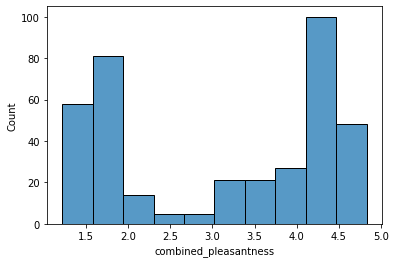

In [255]:
sns.histplot(bellezza_test_merge['combined_pleasantness'])

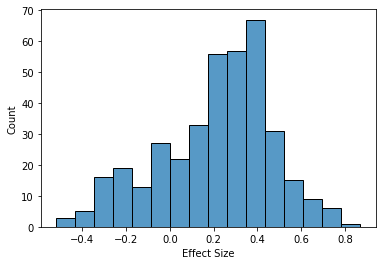

In [254]:
sns.histplot(bellezza_test_merge['Effect Size'])

In [1]:
bellezza_test_merge

NameError: name 'bellezza_test_merge' is not defined